Test with a mnist dataset for the models. 

Import the models and the detaset

In [2]:
import Model
import tensorflow as tf
from tensorflow import keras
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

print(tf.__version__)
print(tf.keras.__version__)

2.0.0-alpha0
2.2.4-tf


See the dataset information

(60000, 28, 28)


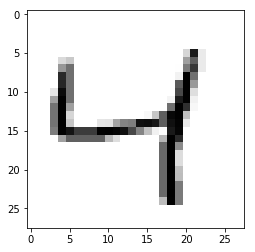

(60000,)
4
x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [3]:
%matplotlib inline 
from matplotlib import pyplot as plt

print(x_train.shape)

plt.imshow(x_train[2], cmap='Greys')
plt.show()

print(y_train.shape)

print(y_train[2])

#Reshepe the vector for the network

# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

Create the attention model

In [4]:
attentionModel = Model.AttentionModel(10, x_train.shape[1], x_train.shape[2])
attentionModel.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
permute_2 (Permute)             (None, 28, 28, 1)    0           input_7[0][0]                    
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 28, 28, 10)   60          permute_2[0][0]                  
__________________________________________________________________________________________________
batch_normalization_v2_6 (Batch (None, 28, 28, 10)   40          conv2d_4[0][0]                   
____________________________________________________________________________________________

Fit the attention model.

In [5]:

attentionModel.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])

import math
#results = attentionModel.fit(x = x_train, y = y_train, batch_size = 32, epochs = 1, use_multiprocessing = True, workers = 4)

Now test the network

In [6]:
attentionModel.evaluate(x_test, y_test)

10000/10000 [==============================] - 4s 354us/sample - loss: 2.3031 - sparse_categorical_accuracy: 0.0446


[2.3030788238525393, 0.0446]

Now try to predict

In [7]:
pred = attentionModel.predict(x_test[55].reshape(1, 28, 28, 1))
print(pred.argmax())
print(y_test[55])

9
0


Now try to train the LSTM Autoencoder 

In [42]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

LSTM_Ae = Model.LSTMAutoencoder(10, x_train.shape[1], x_train.shape[2])
LSTM_Ae.summary()

Model: "model_10"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_15 (InputLayer)           [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
bidirectional_17 (Bidirectional [(None, 128), (None, 47616       input_15[0][0]                   
__________________________________________________________________________________________________
dense_59 (Dense)                (None, 32)           2080        bidirectional_17[0][1]           
__________________________________________________________________________________________________
dense_60 (Dense)                (None, 32)           2080        bidirectional_17[0][2]           
___________________________________________________________________________________________

We need to create a replica of the input for the decoder input

In [43]:
import numpy as np
print(x_train[25])
print(x_train.shape)
x_train_2 = np.delete(x_train,0,2)
print(x_train_2.shape)
print(x_train_2[25])
x_train_3 = np.insert(x_train_2, 0, values=0, axis=2)
print(x_train_3.shape)
print(x_train[25])
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [44]:
# Run training
LSTM_Ae.compile(optimizer='adam', loss='mse', metrics=['mse'])
LSTM_Ae.fit([x_train_noisy, x_train_3], x_train,
          batch_size=32,
          epochs=3)

Epoch 1/3
60000/60000 [==============================] - 43s 714us/sample - loss: 0.0097 - mse: 0.0097
Epoch 2/3
60000/60000 [==============================] - 41s 677us/sample - loss: 0.0059 - mse: 0.0059
Epoch 3/3
60000/60000 [==============================] - 41s 675us/sample - loss: 0.0049 - mse: 0.0049


Try to save the weights of the model

In [45]:
# Save weights of the model
LSTM_Ae.save_weights('prova.h5')
#LSTM_Ae.load_weights('prova.h5')

Now I need to transfer the weight of the autoencoder to the encoder only and create a FCNN to predict

In [46]:
LSTM_Encoder = Model.LSTMAutoencoder_Encoder(10, x_train.shape[1], x_train.shape[2])
LSTM_Encoder.summary()

#print(LSTM_Ae.layers[3])

weights = LSTM_Ae.layers[1].get_weights()
LSTM_Encoder.layers[1].set_weights(weights)
weights = LSTM_Ae.layers[2].get_weights()
LSTM_Encoder.layers[2].set_weights(weights)
weights = LSTM_Ae.layers[3].get_weights()
LSTM_Encoder.layers[3].set_weights(weights)
weights = LSTM_Ae.layers[4].get_weights()
LSTM_Encoder.layers[4].set_weights(weights)
weights = LSTM_Ae.layers[5].get_weights()
LSTM_Encoder.layers[5].set_weights(weights)

#print(weights)

Model: "model_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_17 (InputLayer)           [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
bidirectional_19 (Bidirectional [(None, 128), (None, 47616       input_17[0][0]                   
__________________________________________________________________________________________________
dense_68 (Dense)                (None, 32)           2080        bidirectional_19[0][1]           
__________________________________________________________________________________________________
dense_69 (Dense)                (None, 32)           2080        bidirectional_19[0][2]           
___________________________________________________________________________________________

Create the classifier

In [47]:
from tensorflow.keras import layers, models

classifier = models.Sequential()
classifier.add(layers.Dense(64, activation='relu', input_shape=(128, )))
classifier.add(layers.Dense(32, activation='relu'))
classifier.add(layers.Dense(10, activation='relu'))

classifier.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_72 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_73 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_74 (Dense)             (None, 10)                330       
Total params: 10,666
Trainable params: 10,666
Non-trainable params: 0
_________________________________________________________________


Now try a encode an image with the encoder

In [48]:
encoding = LSTM_Encoder.predict(x_train)

print(encoding.shape)
print(y_train.shape)
print(encoding[504])

(60000, 128)
(60000,)
[0.14202443 0.         0.4095987  0.         0.18573812 0.
 0.03791846 0.17983508 0.         0.08225048 0.         0.
 0.38131067 0.82652974 0.         0.         0.34806567 0.21425448
 1.1121778  0.         0.         0.836656   0.41981107 0.7728523
 0.45083988 0.         0.         0.35173804 0.         0.
 0.04787876 0.         2.5263226  1.3630923  1.1277492  1.6303258
 0.         0.         0.9601619  0.         0.8701602  0.
 0.         0.         0.         1.6726061  0.         0.
 0.         0.         0.         0.         0.         0.
 0.         1.1474745  0.         0.         0.23674971 0.874956
 0.         0.         0.         0.         0.31387484 0.
 0.         0.         0.         0.         0.16530606 0.23236063
 0.68613756 0.2914558  0.52099526 0.         0.74733    0.5314602
 0.         0.         0.         0.         0.6062632  0.
 0.         0.         0.         0.         0.         0.
 1.0745318  0.         0.         0.         0.346

Now we can train the classifier with the encode word

In [49]:
classifier.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

classifier.fit(x = encoding, y = y_train, batch_size = 32, epochs = 5)

Epoch 1/5
60000/60000 [==============================] - 2s 33us/sample - loss: 2.3967 - accuracy: 0.1008
Epoch 2/5
60000/60000 [==============================] - 2s 32us/sample - loss: 2.3026 - accuracy: 0.0987
Epoch 3/5
60000/60000 [==============================] - 2s 32us/sample - loss: 2.3026 - accuracy: 0.0987
Epoch 4/5
60000/60000 [==============================] - 2s 30us/sample - loss: 2.3026 - accuracy: 0.0987
Epoch 5/5
60000/60000 [==============================] - 2s 29us/sample - loss: 2.3026 - accuracy: 0.0987


In [50]:
code = LSTM_Encoder.predict(x_test)
pred = classifier.evaluate(code, y_test)
#print(pred.argmax())
#print(y_test[40])

10000/10000 [==============================] - 0s 19us/sample - loss: 2.3026 - accuracy: 0.0980
